In [1]:
import pandas as pd
import thinkplot
import numpy as np

Find median weekly income and calculate proportion of women workers for each occupation. Data from CPS and BLS. 

Read in data

In [2]:
df_2018_raw = pd.read_excel('Data/weeklyincome_occupation_gender_2018.xlsx')

In [3]:
df_2018_raw.head()

,Occupation,Total Number of workers,Total Median weekly earnings,Men Number of workers,Men Median weekly earnings,Women Number of workers,Women Median weekly earnings
0,"Total, full-time wage and salary workers",115567.0,886,64142.0,973,51425.0,789
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Management, professional, and related occupations",48808.0,1246,23685.0,1468,25123.0,1078
3,"Management, business, and financial operations...",19863.0,1355,10668.0,1537,9195.0,1168
4,Management occupations,13477.0,1429,7754.0,1585,5724.0,1236


Remove NaNs that occur between types of occupations

In [4]:
df_2018 = df_2018_raw.dropna()
df_2018.head()

,Occupation,Total Number of workers,Total Median weekly earnings,Men Number of workers,Men Median weekly earnings,Women Number of workers,Women Median weekly earnings
0,"Total, full-time wage and salary workers",115567.0,886,64142.0,973,51425.0,789
2,"Management, professional, and related occupations",48808.0,1246,23685.0,1468,25123.0,1078
3,"Management, business, and financial operations...",19863.0,1355,10668.0,1537,9195.0,1168
4,Management occupations,13477.0,1429,7754.0,1585,5724.0,1236
5,Chief executives,1098.0,2291,790.0,2488,307.0,1736


Calculate the proportion of females in each occupation and store in Series

In [5]:
female_props = (df_2018['Women Number of workers']/df_2018['Total Number of workers'])*100
female_props.head()

0    44.497997
2    51.473119
3    46.292101
4    42.472360
5    27.959927
dtype: float64

Create a new DataFrame that just contains the occupation, median weekly income, and proportion of females

In [6]:
d = {'Occupation': df_2018['Occupation'], 'Weekly Pay': df_2018['Total Median weekly earnings'], 'Percent Female': female_props}
df_2018_result = pd.DataFrame(d)
df_2018_result.head()

,Occupation,Weekly Pay,Percent Female
0,"Total, full-time wage and salary workers",886,44.497997
2,"Management, professional, and related occupations",1246,51.473119
3,"Management, business, and financial operations...",1355,46.292101
4,Management occupations,1429,42.472360
5,Chief executives,2291,27.959927


Only select for the weekly pays that are not spaces (the spaces are the result of me replacing '-' with ' ' in Excel)

In [7]:
df_2018_result = df_2018_result[df_2018_result['Weekly Pay'] != ' ']

Sort the DataFrame rows by weekly incomes with the higher incomes at the top

In [8]:
df_2018_result = df_2018_result.sort_values(by=['Weekly Pay'], ascending=False)

Display results for highest paid occupations

In [18]:
df_2018_result.iloc[:10]

,Occupation,Weekly Pay,Percent Female
5,Chief executives,2291,27.959927
23,Architectural and engineering managers,2226,12.751678
180,Pharmacists,2071,62.737643
181,Physicians and surgeons,2001,42.563482
138,Lawyers,1947,40.328253
197,Nurse practitioners,1894,84.810127
177,Dentists,1884,50.000000
12,Computer and information systems managers,1877,25.457571
70,"Software developers, applications and systems ...",1864,20.297952
88,Chemical engineers,1858,12.307692


Display results for lowest paid occupations

In [21]:
df_2018_result.iloc[-10:]

,Occupation,Weekly Pay,Percent Female
245,Cooks,486,39.320755
251,"Food servers, nonrestaurant",484,69.811321
254,"Hosts and hostesses, restaurant, lounge, and c...",471,76.470588
260,Maids and housekeeping cleaners,467,87.636364
289,Cashiers,465,72.877698
246,Food preparation workers,463,56.448203
252,Dining room and cafeteria attendants and barte...,447,49.152542
253,Dishwashers,441,19.819820
248,"Combined food preparation and serving workers,...",436,56.462585
488,Laundry and dry-cleaning workers,432,70.370370


Plot women's median weekly earnings as a share of white men's over time for different races. Data from CPS.

Read in the data, each row corresponds to a particular gender and race

In [11]:
df_race_raw = pd.read_excel('Data/weeklyincome_gender_race_1979to2018.xlsx')

In [12]:
df_race_raw.head()

,Series ID,Annual 1979,Annual 1980,Annual 1981,Annual 1982,Annual 1983,Annual 1984,Annual 1985,Annual 1986,Annual 1987,...,Annual 2009,Annual 2010,Annual 2011,Annual 2012,Annual 2013,Annual 2014,Annual 2015,Annual 2016,Annual 2017,Annual 2018
0,LEU0252883900,298.0,320.0,350.0,375.0,387.0,401.0,418.0,433.0,450.0,...,845,850,856,879,884,897,920,942,971,1002
1,LEU0252884200,184.0,203.0,221.0,242.0,254.0,268.0,281.0,294.0,307.0,...,669,684,703,710,722,734,743,766,795,817
2,LEU0252885100,169.0,185.0,206.0,217.0,232.0,241.0,252.0,264.0,276.0,...,582,592,595,599,606,611,615,641,657,654
3,LEU0254468600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,779,773,751,770,819,841,877,902,903,937
4,LEU0252886000,157.0,172.0,190.0,203.0,215.0,223.0,230.0,241.0,251.0,...,509,508,518,521,541,548,566,586,603,617


Generate year range and extract the values of the white male income row

In [13]:
years = range(1979, 2019)
white_male_income = df_race_raw.loc[0].values[1:]
white_male_income

array([298.0, 320.0, 350.0, 375.0, 387.0, 401.0, 418.0, 433.0, 450.0,
       465.0, 482.0, 494.0, 506.0, 514.0, 524.0, 547.0, 566.0, 580.0,
       595.0, 615.0, 638.0, 662, 689, 702, 715, 732, 743, 761, 788, 825,
       845, 850, 856, 879, 884, 897, 920, 942, 971, 1002], dtype=object)

Find proportions of female median weekly income to male median weekly income for each year and race

In [14]:
white_female_income_prop = df_race_raw.loc[1].values[1:]/white_male_income
black_female_income_prop = df_race_raw.loc[2].values[1:]/white_male_income
asian_female_income_prop = df_race_raw.loc[3].values[1:]/white_male_income
hispanic_female_income_prop = df_race_raw.loc[4].values[1:]/white_male_income

Create another DataFrame with calculated values

In [15]:
d = {'Years': years, 'White Women': white_female_income_prop, 'Black Women': black_female_income_prop, 'Asian Women': asian_female_income_prop, 'Hispanic Women': hispanic_female_income_prop}
df_race = pd.DataFrame(d)
df_race.head()

,Years,White Women,Black Women,Asian Women,Hispanic Women
0,1979,0.61745,0.567114,NaN,0.526846
1,1980,0.634375,0.578125,NaN,0.5375
2,1981,0.631429,0.588571,NaN,0.542857
3,1982,0.645333,0.578667,NaN,0.541333
4,1983,0.656331,0.599483,NaN,0.555556


Plot the columns of the new DataFrame

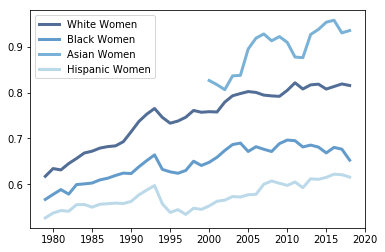

In [16]:
thinkplot.Plot(df_race['Years'], df_race['White Women'], label='White Women')
thinkplot.Plot(df_race['Years'], df_race['Black Women'], label='Black Women')
thinkplot.Plot(df_race['Years'], df_race['Asian Women'], label='Asian Women')
thinkplot.Plot(df_race['Years'], df_race['Hispanic Women'], label='Hispanic Women')
thinkplot.Show()